In [14]:
import os


if 'original_dir' not in globals():
    original_dir = os.getcwd()
os.chdir(os.path.join(original_dir, os.pardir))
# parent_dir = os.path.abspath(os.path.join(original_dir, os.pardir))
# os.listdir()
# os.chdir(parent_dir)


In [15]:
os.getcwd()

'c:\\Users\\G\\Desktop\\UZH_Network'

In [ ]:
study_programs

In [50]:
import pandas as pd
import os



time_schedule = pd.read_csv("data/csv/HS24/VVZ_HS24_time_schedule.csv")
df = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")
study_programs = pd.read_csv("data/csv/HS24/VVZ_HS24_study_programs.csv", encoding="utf-16")
modules = pd.read_csv("data/csv/HS24/VVZ_HS24_modules.csv", encoding="utf-16")
module_components = pd.read_csv("data/csv/HS24/VVZ_HS24_module_components.csv", encoding="utf-16")

df.head()

,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
0,Doctoral Program Drug Discovery,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Michael Arand,Olga von Niederhäusern,Joint Doctorate at the Faculty of Science of t...
1,Doctoral Program Evolutionary Biology,English,https://www.mnf.uzh.ch/en/studium/reglemente.html,Faculty of Science,Kentaro Shimizu,Anton Weingrill,Joint Doctorate at the Faculty of Science of t...
2,Doctoral Program Mathematics,English,NaN,Faculty of Science,Benjamin Schlein,Jessica Bolsinger,Doctorate Faculty of Science
3,Major 90 Artificial Intelligence (Fast Track),English,https://www.oec.uzh.ch/en/studies/general/regu...,NaN,NaN,NaN,Master of Science UZH in Informatics (PVO08)
4,Concentration General Geography,English,NaN,Faculty of Science,NaN,NaN,Master of Science Faculty of Science (120) (2021)


In [46]:
science = study_programs[study_programs["Organization"] == "Faculty of Science"]
science["Program"].value_counts()

,Program,Organization
438,Concentration Animal Behaviour,Faculty of Science
10,Concentration Animal Behaviour,Faculty of Science
9,Concentration Anthropology,Faculty of Science
440,Concentration Anthropology,Faculty of Science
492,Concentration Biomolecular Track,Faculty of Science
...,...,...
429,Single Major 90 Medical Biology (specialized M...,Faculty of Science
428,Single Major 90 Physics,Faculty of Science
427,Single Major 90 Physics (Fast Track),Faculty of Science
665,Single Major 90 Quantitative Environmental Sci...,Faculty of Science


In [64]:
science = study_programs[study_programs["Organization"] == "Faculty of Science"]
economics = study_programs[study_programs["Organization"] == "Faculty of Business, Economics and Informatics"]



In [66]:
science_majors = science[science["Program"].str.contains("Major", case=False, na=False)]
majors = science[science["Program"].str.contains("Major", case=False, na=False)]
economics_majors = economics[economics["Program"].str.contains("Major", case=False, na=False)]
majors


,Program,Languages,Regulations,Organization,Responsible Instructor,Coordination,Part Of
23,Major 150 Physics,"English, German",NaN,Faculty of Science,Christof Aegerter,Anna Katharina Troller,Bachelor of Science Faculty of Science (2021)
25,Major 120 Chemistry,"German, English",NaN,Faculty of Science,Sandra Erika Luber,Sabine Stockhause,Bachelor of Science Faculty of Science (2021)
65,Single Major 180 Biology,"English, German",NaN,Faculty of Science,Konrad Basler,Karin Isler,Bachelor of Science Faculty of Science (2021)
69,Single Major 180 Chemistry,"German, English",NaN,Faculty of Science,Sandra Erika Luber,Sabine Stockhause,Bachelor of Science Faculty of Science (2021)
70,Single Major 180 Earth System Science,"German, English",NaN,Faculty of Science,Norman Backhaus,Yvonne Scheidegger,Bachelor of Science Faculty of Science (2021)
71,Single Major 180 Geography,"German, English",NaN,Faculty of Science,Norman Backhaus,Yvonne Scheidegger,Bachelor of Science Faculty of Science (2021)
72,Single Major 180 Mathematics,"English, German",NaN,Faculty of Science,Reinhard Furrer,Maja Bettina Schärer,Bachelor of Science Faculty of Science (2021)
73,Single Major 180 Physics,"German, English",NaN,Faculty of Science,Christof Aegerter,Anna Katharina Troller,Bachelor of Science Faculty of Science (2021)
74,Single Major 180 Chemistry and Business Studies,"English, German",NaN,Faculty of Science,Stefan Seeger,Sabine Stockhause,Bachelor of Science Faculty of Science (2021)
85,Major 120 Biology,"English, German",NaN,Faculty of Science,Konrad Basler,Karin Isler,Bachelor of Science Faculty of Science (2021)


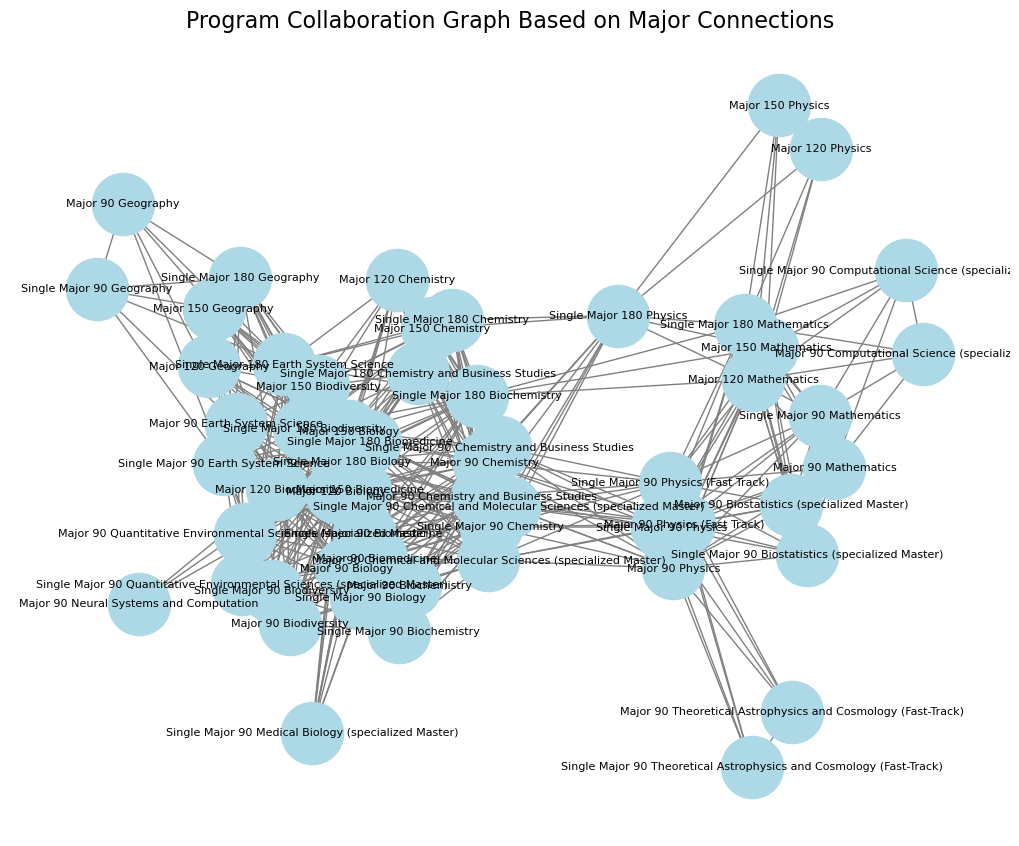

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

majors = sorted_science[sorted_science["Program"].str.contains("Major", case=False, na=False)]
module_components = pd.read_csv("data/csv/HS24/VVZ_HS24_module_components.csv", encoding="utf-16")

edges = []
for _, row in module_components.iterrows():
    components = row['Components']
    

    if pd.isna(components):
        continue
    
    for major in majors['Program']:
        if major in components:
            for other_major in majors['Program']:
                if other_major in components and major != other_major:
                    edges.append((major, other_major))


G = nx.Graph()
G.add_edges_from(edges)


def plot_graph(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=8
    )
    plt.title("Program Collaboration Graph Based on Major Connections", fontsize=16)
    plt.show()


plot_graph(G)


In [34]:
study_programs["Organization"].unique()
organization_counts = study_programs["Organization"].value_counts()
organization_counts

Organization
Faculty of Science                                        210
Institute of Education                                     88
Faculty of Business, Economics and Informatics             71
Faculty of Theology and the Study of Religion              38
Department of Romance Studies                              28
Institute of Asian and Oriental Studies                    27
Department of German and Scandinavian Studies              17
Faculty of Law                                             17
Department of Greek and Latin Philology                    15
Department of History                                      15
Institute of Art History                                   12
Geschäftsstelle UMZH / MeF                                  9
Department of Archaeology                                   9
Department of Social Anthropology and Cultural Studies      8
Department of Communication and Media Research              8
Department of Political Science                          

In [37]:

programs = study_programs["Program"].value_counts()
programs

Program
Minor 30 Business Administration               5
Minor 30 Neuroinformatics                      4
Minor 30 Physics                               4
Minor 30 Earth System Science                  4
Single Major 90 Law                            4
                                              ..
Minor 30 General and Comparative Literature    1
Minor 30 Social Sciences                       1
Minor 30 Methods – Data – Society              1
Minor 30 Political Studies                     1
Minor 30 Digital Skills                        1
Name: count, Length: 580, dtype: int64

In [35]:
faculty_counts = organization_counts[organization_counts.index.str.contains("Faculty")]
faculty_counts

Organization
Faculty of Science                                210
Faculty of Business, Economics and Informatics     71
Faculty of Theology and the Study of Religion      38
Faculty of Law                                     17
Faculty of Arts and Social Sciences                 6
Vetsuisse Faculty                                   5
Faculty of Medicine                                 4
Name: count, dtype: int64

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def create_graph(df):

    G = nx.Graph()
    for org in df["Organization"].dropna().unique():
        programs = df[df["Organization"] == org]["Program"].tolist()
        for i in range(len(programs)):
            for j in range(i + 1, len(programs)):
                G.add_edge(programs[i], programs[j])
    return G

def plot_graph(G):

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2, font_size=8
    )
    plt.title("Program Collaboration Graph Based on Organization", fontsize=16)
    plt.show()

def compute_metrics_and_plot(G):

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    degree_dist = [d for n, d in G.degree()]
    clustering_coefficient = nx.average_clustering(G)
    connected_components = list(nx.connected_components(G))
    largest_component_size = len(max(connected_components, key=len))
    
    metrics = {
        "Number of Nodes": num_nodes,
        "Number of Edges": num_edges,
        "Average Degree": sum(degree_dist) / num_nodes if num_nodes > 0 else 0,
        "Clustering Coefficient": clustering_coefficient,
        "Number of Connected Components": len(connected_components),
        "Largest Component Size": largest_component_size,
    }
    
    print("Graph Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    
    # Plot degree distribution
    plt.figure(figsize=(10, 6))
    plt.hist(degree_dist, bins=range(min(degree_dist), max(degree_dist) + 2), color="skyblue", edgecolor="black")
    plt.title("Degree Distribution", fontsize=16)
    plt.xlabel("Degree", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


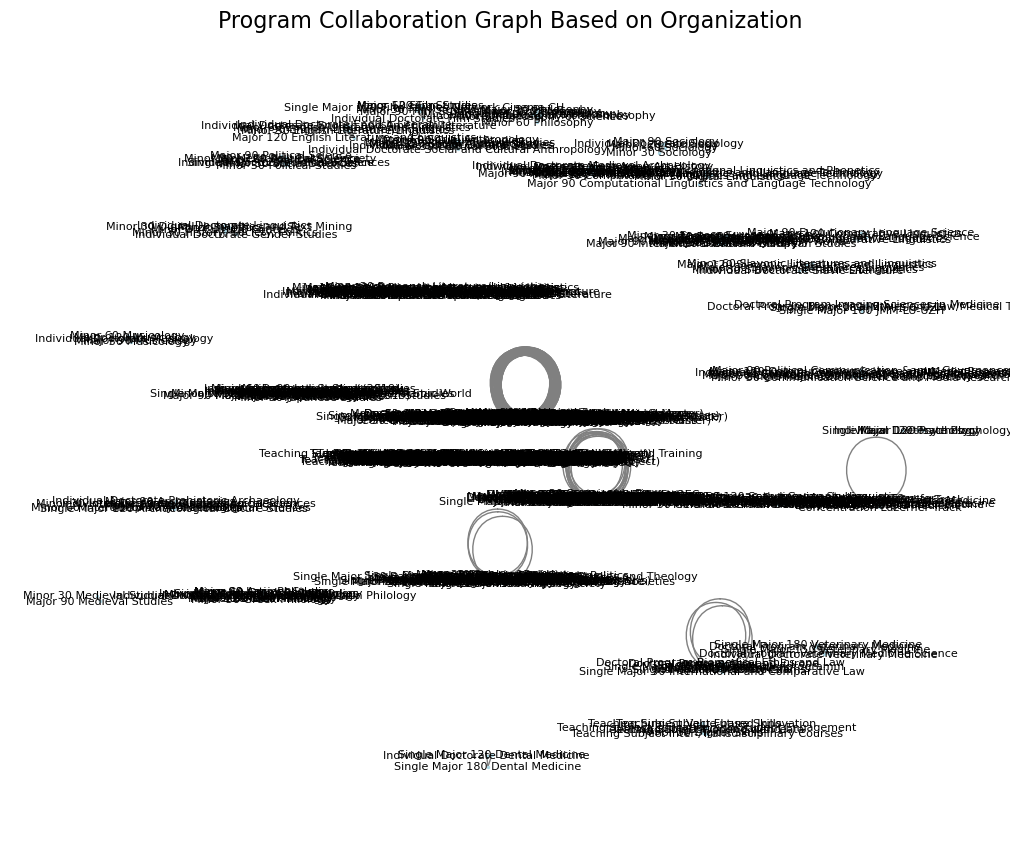

Graph Metrics:
Number of Nodes: 550
Number of Edges: 16278
Average Degree: 59.192727272727275
Clustering Coefficient: 0.9963636363636363
Number of Connected Components: 31
Largest Component Size: 135


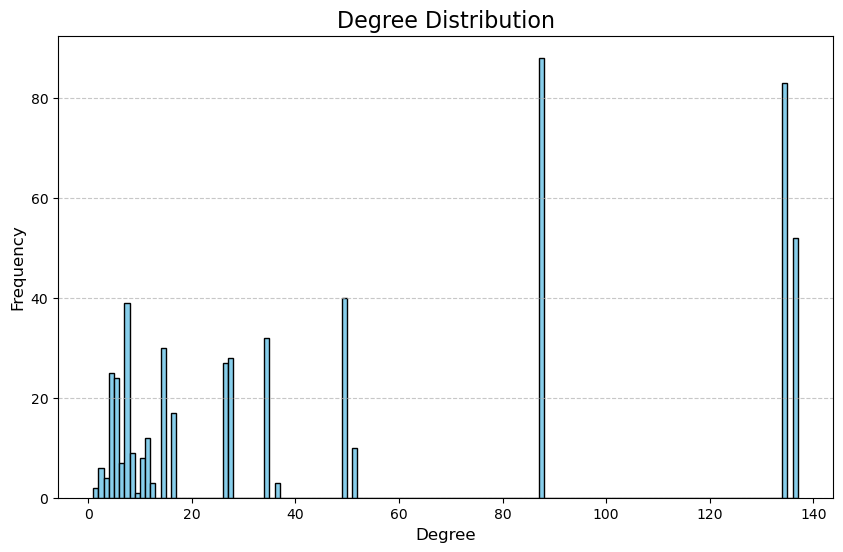

In [18]:

G = create_graph(df)

plot_graph(G)
compute_metrics_and_plot(G)


In [19]:
def create_weighted_graph(df):

    G = nx.Graph()

    # Parse 'Part Of' values into lists
    df["Part Of"] = df["Part Of"].fillna("").apply(lambda x: x.split(";"))

    # Create edges based on shared 'Part Of' values
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            # Calculate shared 'Part Of' values
            shared_part_of = set(df.iloc[i]["Part Of"]) & set(df.iloc[j]["Part Of"])
            if shared_part_of:
                # Add or update edge weight
                weight = len(shared_part_of)
                if G.has_edge(df.iloc[i]["Program"], df.iloc[j]["Program"]):
                    G[df.iloc[i]["Program"]][df.iloc[j]["Program"]]["weight"] += weight
                else:
                    G.add_edge(df.iloc[i]["Program"], df.iloc[j]["Program"], weight=weight)
    return G

def plot_weighted_graph(G):

    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42)  # Generate layout for consistent plots

    # Extract edge weights for visual representation
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

    nx.draw(
        G, pos, with_labels=False, node_color="lightblue", edge_color="gray", node_size=10
    )
    nx.draw_networkx_edges(
        G, pos, edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Blues, width=2
    )

    plt.title("Program Collaboration Graph Based on 'Part Of' Values", fontsize=16)
    plt.show()

def compute_metrics_and_plot_weighted(G):

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    degree_dist = [d for n, d in G.degree()]
    weight_dist = [attr["weight"] for _, _, attr in G.edges(data=True)]
    clustering_coefficient = nx.average_clustering(G, weight="weight")
    connected_components = list(nx.connected_components(G))
    largest_component_size = len(max(connected_components, key=len))

    metrics = {
        "Number of Nodes": num_nodes,
        "Number of Edges": num_edges,
        "Average Degree": sum(degree_dist) / num_nodes if num_nodes > 0 else 0,
        "Clustering Coefficient": clustering_coefficient,
        "Number of Connected Components": len(connected_components),
        "Largest Component Size": largest_component_size,
        "Average Edge Weight": sum(weight_dist) / len(weight_dist) if weight_dist else 0,
    }

    print("Graph Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Plot degree distribution
    plt.figure(figsize=(10, 6))
    plt.hist(degree_dist, bins=range(min(degree_dist), max(degree_dist) + 2), color="skyblue", edgecolor="black")
    plt.title("Degree Distribution", fontsize=16)
    plt.xlabel("Degree", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


    plt.figure(figsize=(10, 6))
    plt.hist(weight_dist, bins=range(1, max(weight_dist) + 2), color="lightgreen", edgecolor="black")
    plt.title("Edge Weight Distribution", fontsize=16)
    plt.xlabel("Edge Weight", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


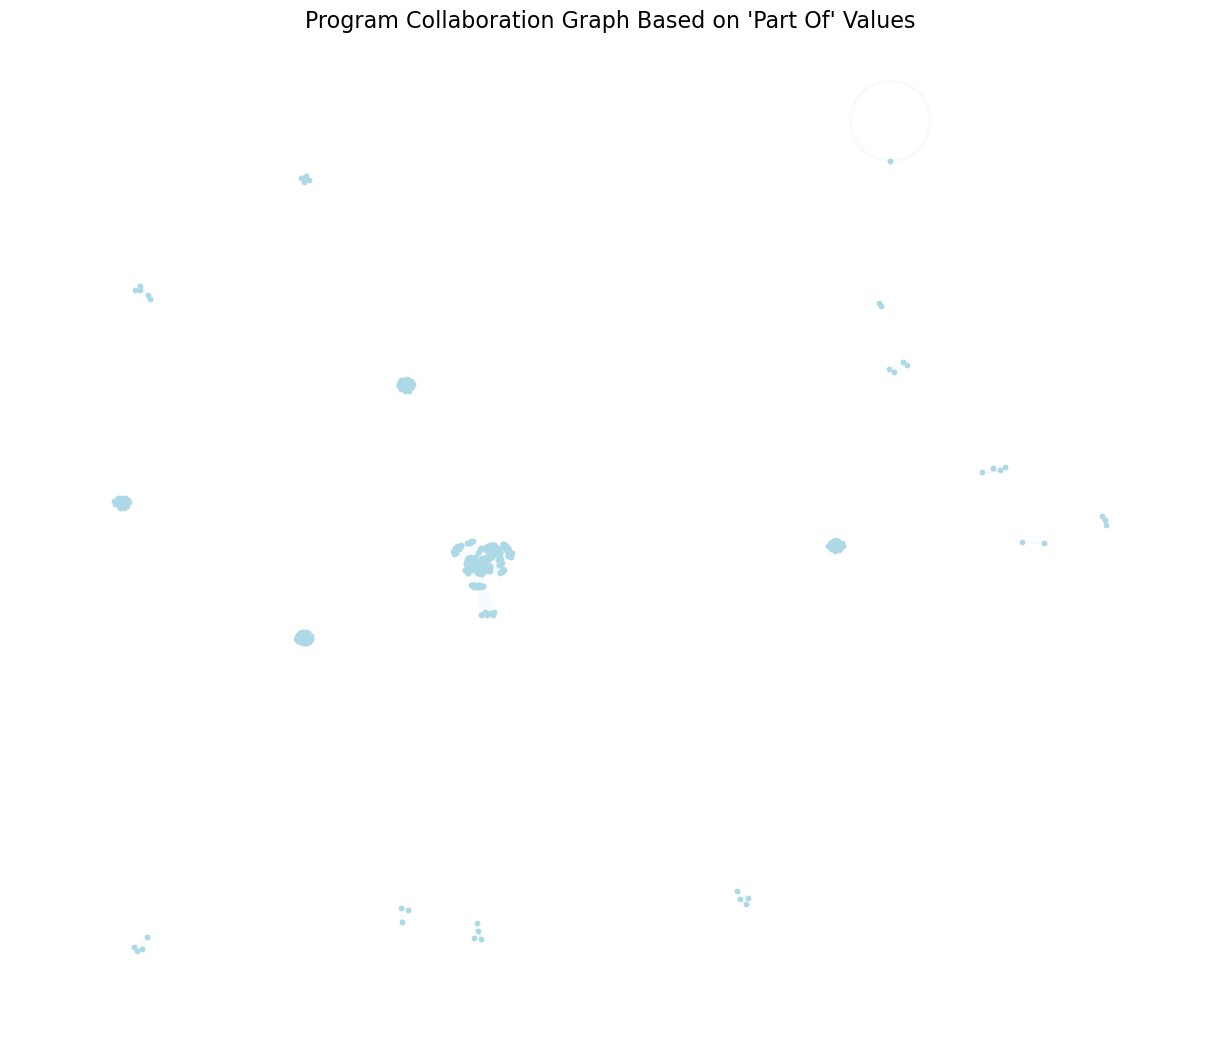

Graph Metrics:
Number of Nodes: 549
Number of Edges: 24753
Average Degree: 90.17486338797814
Clustering Coefficient: 0.11353258564272659
Number of Connected Components: 17
Largest Component Size: 371
Average Edge Weight: 1.6491738375146447


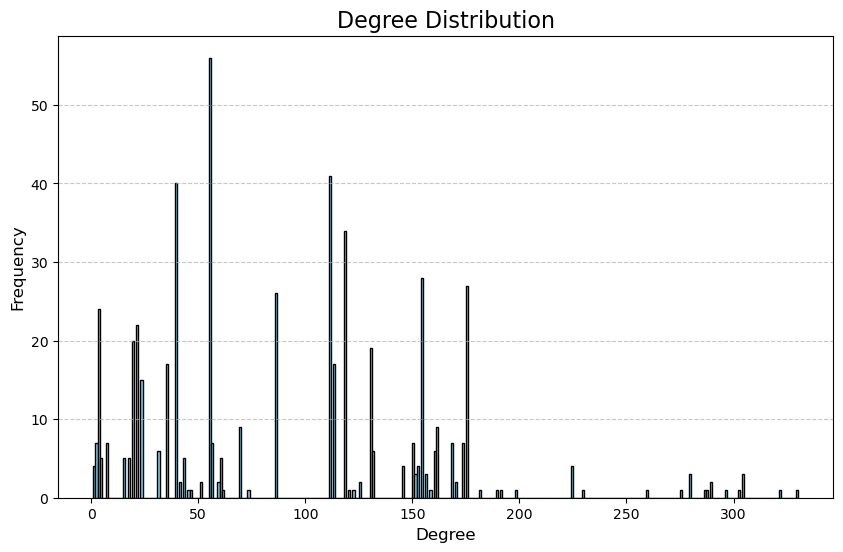

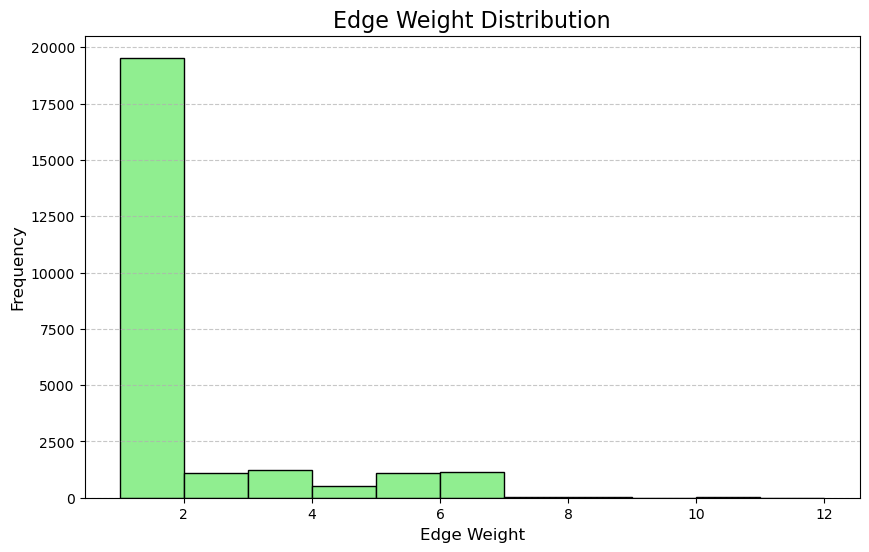

In [20]:

G_weighted = create_weighted_graph(df)

plot_weighted_graph(G_weighted)
compute_metrics_and_plot_weighted(G_weighted)


In [21]:
def analyze_graph(G, top_n=5):

    degrees = dict(G.degree())
    sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
    highest_degree_nodes = sorted_degrees[:top_n]
    lowest_degree_nodes = sorted_degrees[-top_n:]


    edge_weights = nx.get_edge_attributes(G, 'weight')
    sorted_edge_weights = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
    highest_weight_edges = sorted_edge_weights[:top_n]
    lowest_weight_edges = sorted_edge_weights[-top_n:]


    analysis = {
        "Top Highest Degree Nodes": highest_degree_nodes,
        "Top Lowest Degree Nodes": lowest_degree_nodes,
        "Top Highest Weight Edges": highest_weight_edges,
        "Top Lowest Weight Edges": lowest_weight_edges,
    }


    print("Graph Analysis:")
    for key, value in analysis.items():
        print(f"\n{key}:")
        for item in value:
            print(f"  {item}")

    return analysis


In [22]:

analysis = analyze_graph(G_weighted)


Graph Analysis:

Top Highest Degree Nodes:
  ('Minor 30 Law', 329)
  ('Minor 30 Biology', 321)
  ('Minor 30 Economics', 304)
  ('Minor 30 Business Administration', 304)
  ('Minor 30 Banking and Finance', 304)

Top Lowest Degree Nodes:
  ('Teaching Subject Veranstaltungen Privatdozierende', 2)
  ('Doctoral Program Informatics', 1)
  ('Doctoral Program Informatics (fast track)', 1)
  ('Single Major 90 Law', 1)
  ('Single Major 90 International and Comparative Law', 1)

Top Highest Weight Edges:
  (('Minor 30 Economics', 'Minor 30 Business Administration'), 11)
  (('Minor 30 Economics', 'Minor 30 Banking and Finance'), 11)
  (('Minor 30 Business Administration', 'Minor 30 Banking and Finance'), 11)
  (('Minor 30 Biology', 'Minor 30 Law'), 11)
  (('Minor 30 Hermeneutics', 'Minor 30 Law'), 11)

Top Lowest Weight Edges:
  (('Major Economics (Fast Track)', 'Major Betriebswirtschaftslehre (Fast Track)'), 1)
  (('Major Economics (Fast Track)', 'Major Banking and Finance (Fast Track)'), 1)
  (('

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_assortativity_scatter(graph, random_graph, title):
    # the average degree connectivity for the original graph
    knn_graph = nx.average_degree_connectivity(graph)

    # the average degree connectivity for the randomized graph
    knn_random_graph = nx.average_degree_connectivity(random_graph)

    # assortativity coefficient for the real and randomized networks
    assortativity_real = nx.degree_assortativity_coefficient(graph)
    assortativity_random = nx.degree_assortativity_coefficient(random_graph)

    # extract degrees (k) and corresponding average neighbor degrees (k_nn(k))
    degrees_graph = list(knn_graph.keys())
    knn_values_graph = list(knn_graph.values())

    degrees_random_graph = list(knn_random_graph.keys())
    knn_values_random_graph = list(knn_random_graph.values())

    # plot for the original and randomized graphs
    plt.figure(figsize=(8, 6))

    # plot for original network
    plt.scatter(degrees_graph, knn_values_graph, color='blue', edgecolor='black', alpha=0.7, label=f'Original Network (r = {assortativity_real:.3f})')

    # plot for randomized network
    plt.scatter(degrees_random_graph, knn_values_random_graph, color='red', edgecolor='black', alpha=0.5, label=f'Randomized Network (r = {assortativity_random:.3f})')

    # plot title and labels
    plt.title(f'Scatter plot of $k_{{nn}}(k)$ vs Degree $k$\nOriginal vs Randomized Network\n{title}')
    plt.xlabel('Degree $k$')
    plt.ylabel('Average Degree of Nearest Neighbors $k_{{nn}}(k)$')
    plt.grid(True)
    plt.legend()
    plt.show()

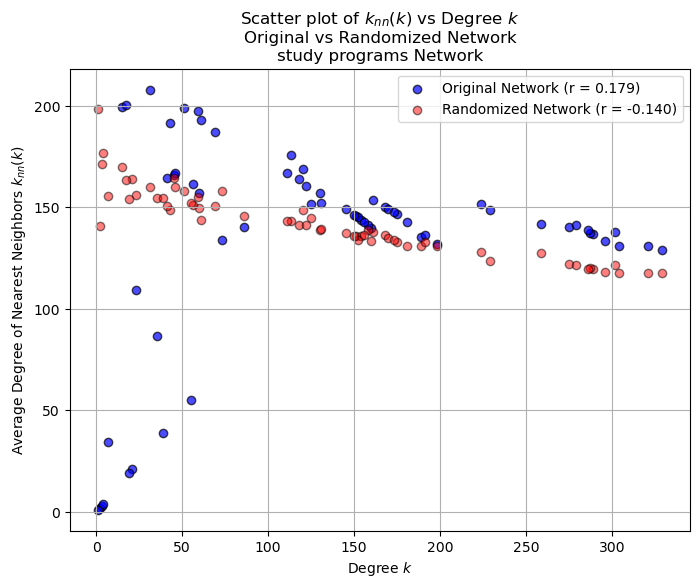

In [24]:

random_graph = nx.algorithms.smallworld.random_reference(G_weighted, niter=2, connectivity=False)
plot_assortativity_scatter(G_weighted, random_graph, f'study programs Network')

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities
import random

# update function
def draw_randomized_communities(G, communities_original, communities_randomized, title):
    # color map for original graph
    community_map_original = {}
    for i, community in enumerate(communities_original):
        for node in community:
            community_map_original[node] = i

    #  color map for randomized graph
    community_map_randomized = {}
    for i, community in enumerate(communities_randomized):
        for node in community:
            community_map_randomized[node] = i

    # positions for both graphs
    pos_original = nx.spring_layout(G, seed=42)
    pos_randomized = nx.spring_layout(G, seed=42)
    # plot side by side
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    # original graph with communities
    plt.sca(ax[0])
    nx.draw_networkx_nodes(G, pos_original, node_size=500, cmap=plt.cm.rainbow,
                           node_color=[community_map_original[node] for node in G.nodes()])
    nx.draw_networkx_edges(G, pos_original, edgelist=G.edges(), edge_color="black", alpha=0.5)
    nx.draw_networkx_labels(G, pos_original)
    plt.title(title + " - Original - " + str(len(communities_original)) + " communities")

    # randomized graph with communities
    plt.sca(ax[1])
    nx.draw_networkx_nodes(G, pos_randomized, node_size=500, cmap=plt.cm.rainbow,
                           node_color=[community_map_randomized[node] for node in G.nodes()])
    nx.draw_networkx_edges(G, pos_randomized, edgelist=G.edges(), edge_color="black", alpha=0.5)
    nx.draw_networkx_labels(G, pos_randomized)
    plt.title(title + " - Randomized - "+ str(len(communities_randomized)) + " communities")

    plt.tight_layout()
    plt.show()

# randomize the network and apply community detection on both the original and randomized network
def randomize_and_compare_communities(graph_name, G):
    # detect communities on the original graph
    gc_original = list(greedy_modularity_communities(G))
    lc_original = list(label_propagation_communities(G))

    # randomize the graph while preserving the degree distribution
    G_randomized = G.copy()
    nx.double_edge_swap(G_randomized, nswap=10 * G.number_of_edges(), max_tries=10000)

    # detect communities on the randomized graph
    gc_randomized = list(greedy_modularity_communities(G_randomized))
    lc_randomized = list(label_propagation_communities(G_randomized))

    # side by side comparison for Greedy Modularity Maximization

    print(f"Greedy Modularity Communities (Original): number = {len(gc_original)}, communities:  {gc_original}")
    print(f"Greedy Modularity Communities (Randomized): number = {len(gc_randomized)}, communities:  {gc_randomized}")
    draw_randomized_communities(G, gc_original, gc_randomized, graph_name + " Greedy Modularity Maximization")

    # side by side comparison for Label Propagation Algorithm
    print(f"Label Propagation Communities (Original): number = {len(lc_original)}, communities:  {lc_original}")
    print(f"Label Propagation Communities (Randomized): number = {len(lc_randomized)}, communities:  {lc_randomized}")
    draw_randomized_communities(G, lc_original, lc_randomized, graph_name + " Label Propagation Algorithm")


In [26]:
# randomize_and_compare_communities(" weight", G_weighted)

In [29]:
def draw_communities(G, communities, title):
    # color map
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i

    pos = nx.spring_layout(G)


    plt.figure(figsize=(10, 7))
    nx.draw_networkx_nodes(G, pos,  node_size=500, cmap=plt.cm.rainbow,
                           node_color=[community_map[node] for node in G.nodes()])

    # edges: black for internal, gray for external links
    internal_edges = []
    external_edges = []
    for edge in G.edges():
        if community_map[edge[0]] == community_map[edge[1]]:
            internal_edges.append(edge)
        else:
            external_edges.append(edge)

    nx.draw_networkx_edges(G, pos,  edgelist=internal_edges, edge_color="black")
    nx.draw_networkx_edges(G, pos, edgelist=external_edges, edge_color="gray", style="dashed")


    # nx.draw_networkx_labels(G, pos )

    plt.title(title)
    plt.show()

Greedy Modularity Communities: number = 18, communities: [frozenset({'Concentration Ecology', 'Minor 30 English Literature/Linguistics', 'Major 90 Physics (Fast Track)', 'Minor 30 Medieval Studies', 'Concentration Remote Sensing', 'Minor 30 Romansh Literature/Linguistics', 'Minor 30 Medieval Latin Philology', 'Major 90 International Eastern European Studies', 'Major 90 Chemistry and Business Studies', 'Major 90 German Literature: Theory – Analysis – Transfer', 'Major 90 Educational Science', 'Major 90 Latin Philology', 'Minor 15 Ancient Christianity', 'Minor 30 Art History', 'Major 90 Slavonic Literatures/Linguistics', 'Major 90 Banking and Finance', 'Minor 30 Musicology', 'Major 90 Social and Cultural Anthropology', 'Minor 30 Comparative Linguistics', 'Single Major 90 Chemical and Molecular Sciences (specialized Master)', 'Major 90 Evolutionary Language Science', 'Minor 30 Ibero-Romance Literatures/Linguistics', 'Minor 30 Islamic Studies', 'Minor 30 Marketing', 'Concentration Neurosci

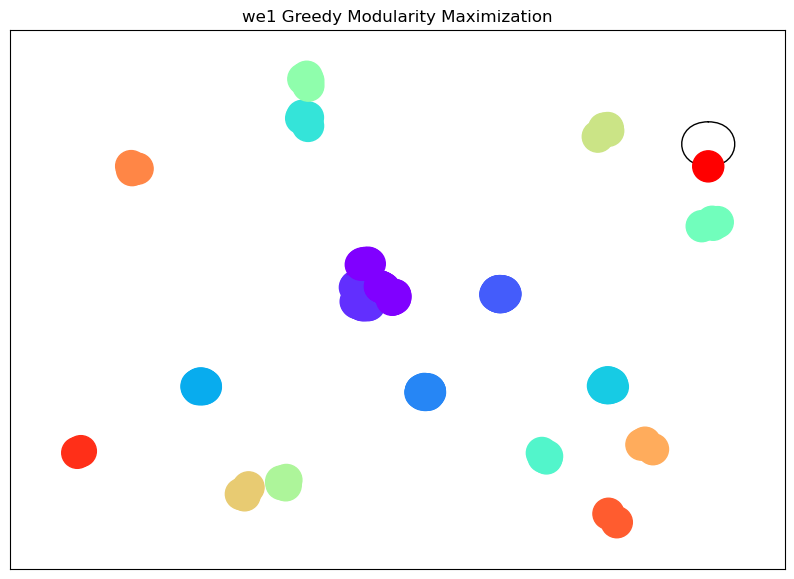

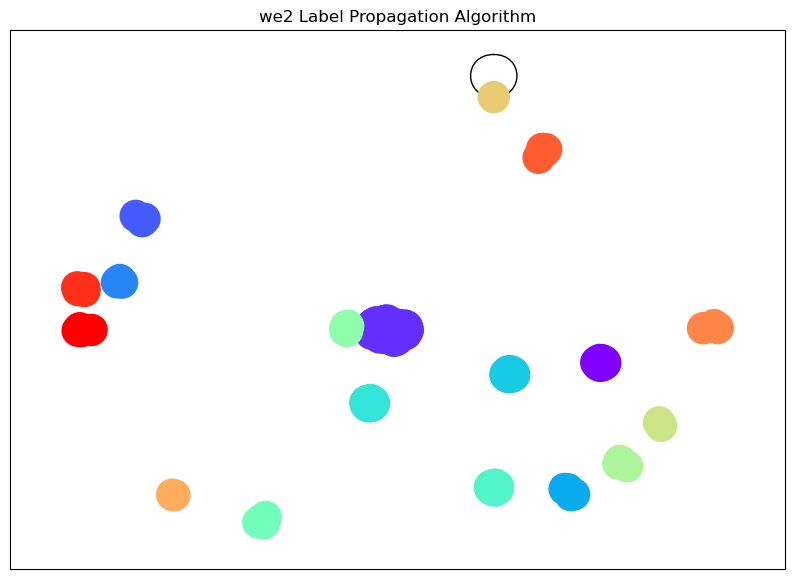

In [28]:
G = G_weighted
gc = list(greedy_modularity_communities(G))
print(f"Greedy Modularity Communities: number = {len(gc)}, communities: {gc}")

lc = list(label_propagation_communities(G))
print(f"Label Propagation Communities: number = {len(lc)}, communities: {lc}")


draw_communities(G, gc, "we1" +" Greedy Modularity Maximization")

draw_communities(G, lc, "we2" +" Label Propagation Algorithm")

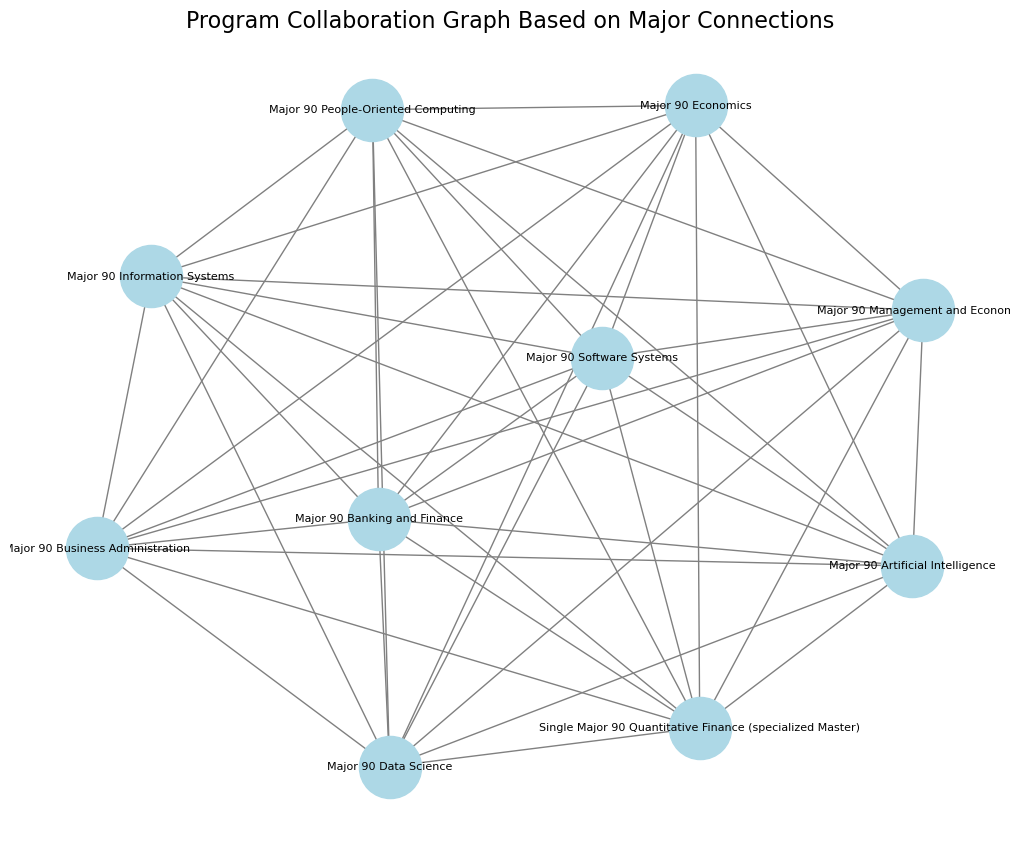

In [72]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

majors = science[science["Program"].str.contains("Major", case=False, na=False)]
economics_majors = economics[economics["Program"].str.contains("Major 90", case=False, na=False)]

module_components = pd.read_csv("data/csv/HS24/VVZ_HS24_module_components.csv", encoding="utf-16")
majors = economics_majors
edges = []
for _, row in module_components.iterrows():
    components = row['Components']
    

    if pd.isna(components):
        continue
    
    for major in majors['Program']:
        if major in components:
            for other_major in majors['Program']:
                if other_major in components and major != other_major:
                    edges.append((major, other_major))


G = nx.Graph()
G.add_edges_from(edges)


def plot_graph(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=8
    )
    plt.title("Program Collaboration Graph Based on Major Connections", fontsize=16)
    plt.show()


plot_graph(G)


Greedy Modularity Communities: number = 1, communities: [frozenset({'Single Major 90 Quantitative Finance (specialized Master)', 'Major 90 Data Science', 'Major 90 Artificial Intelligence', 'Major 90 Business Administration', 'Major 90 Software Systems', 'Major 90 People-Oriented Computing', 'Major 90 Information Systems', 'Major 90 Management and Economics', 'Major 90 Economics', 'Major 90 Banking and Finance'})]
Label Propagation Communities: number = 1, communities: [{'Single Major 90 Quantitative Finance (specialized Master)', 'Major 90 Data Science', 'Major 90 Artificial Intelligence', 'Major 90 Business Administration', 'Major 90 Software Systems', 'Major 90 People-Oriented Computing', 'Major 90 Information Systems', 'Major 90 Management and Economics', 'Major 90 Economics', 'Major 90 Banking and Finance'}]


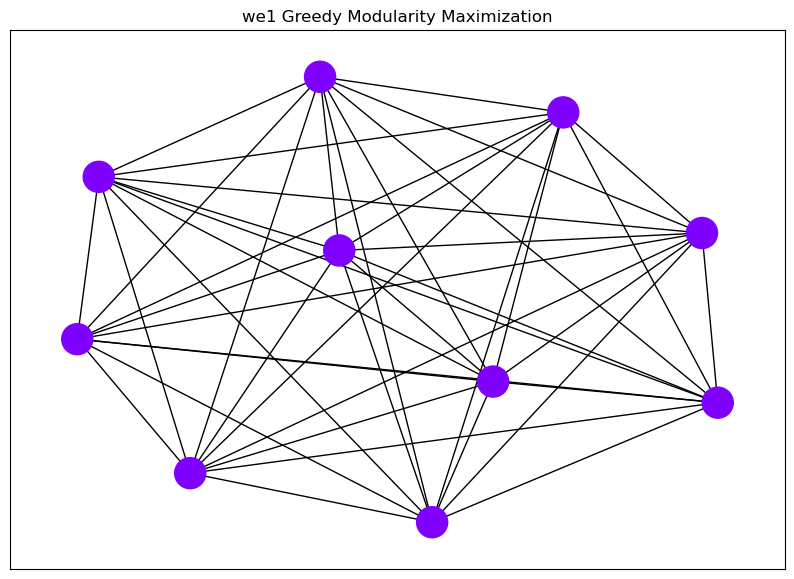

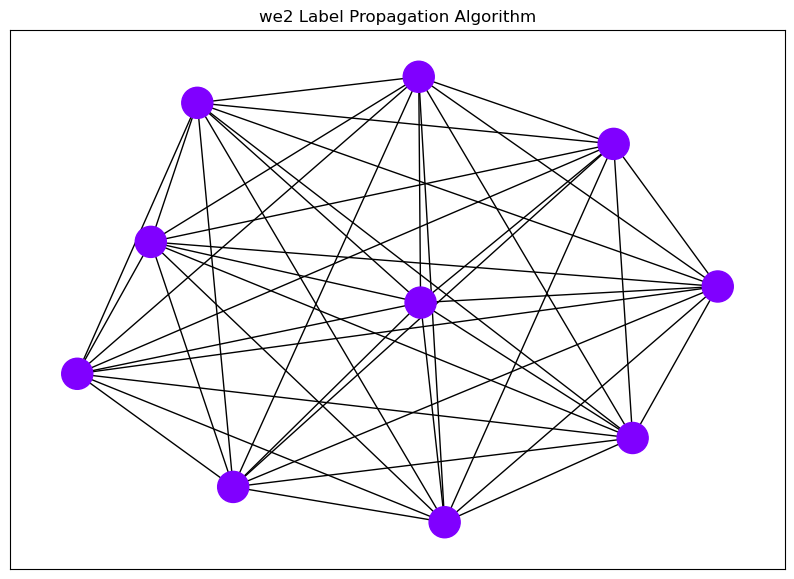

In [73]:
gc = list(greedy_modularity_communities(G, best_n=10))
print(f"Greedy Modularity Communities: number = {len(gc)}, communities: {gc}")

lc = list(label_propagation_communities(G))
print(f"Label Propagation Communities: number = {len(lc)}, communities: {lc}")


draw_communities(G, gc, "we1" +" Greedy Modularity Maximization")

draw_communities(G, lc, "we2" +" Label Propagation Algorithm")

Greedy Modularity Communities: number = 3, communities: [frozenset({'Minor 30 Accounting and Finance', 'Minor 30 Financial Economics', 'Minor 30 Sports Management', 'Minor 30 Banking', 'Minor 30 Corporate Finance', 'Minor 30 Quantitative Finance', 'Minor 30 Managing Education', 'Minor 30 Business Administration', 'Minor 60 Business Administration', 'Minor 30 Marketing', 'Minor 30 Banking and Finance', 'Minor 30 Sustainable Finance', 'Minor 30 General Business and Economics'}), frozenset({'Minor 30 Information Systems', 'Minor 30 Data Science', 'Minor 30 Information Systems for OEC', 'Minor 30 People-Oriented Computing for OEC', 'Minor 30 Informatics', 'Minor 30 People-Oriented Computing', 'Minor 30 Software Systems', 'Minor 60 Informatics', 'Minor 60 People-Oriented Computing'}), frozenset({'Minor 30 Development and Economic Policy', 'Minor 60 Economics', 'Minor 30 Behavioral Economics', 'Minor 30 Economics'})]
Label Propagation Communities: number = 2, communities: [{'Minor 30 Data Sc

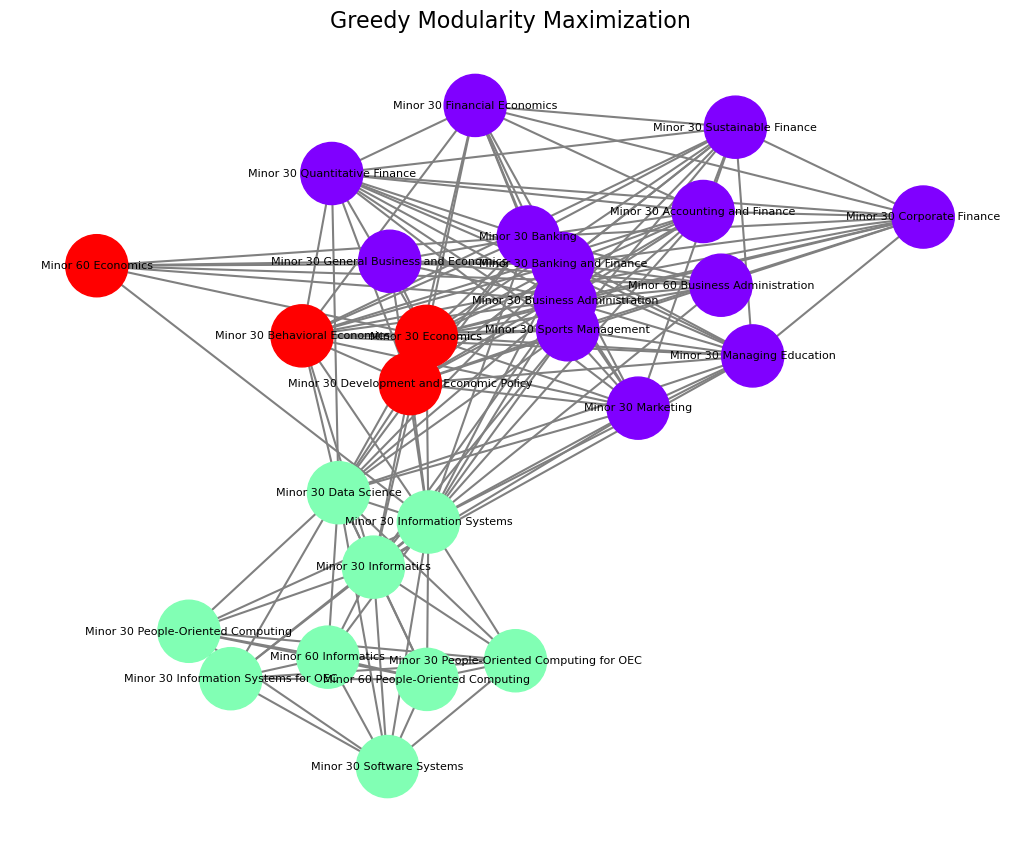

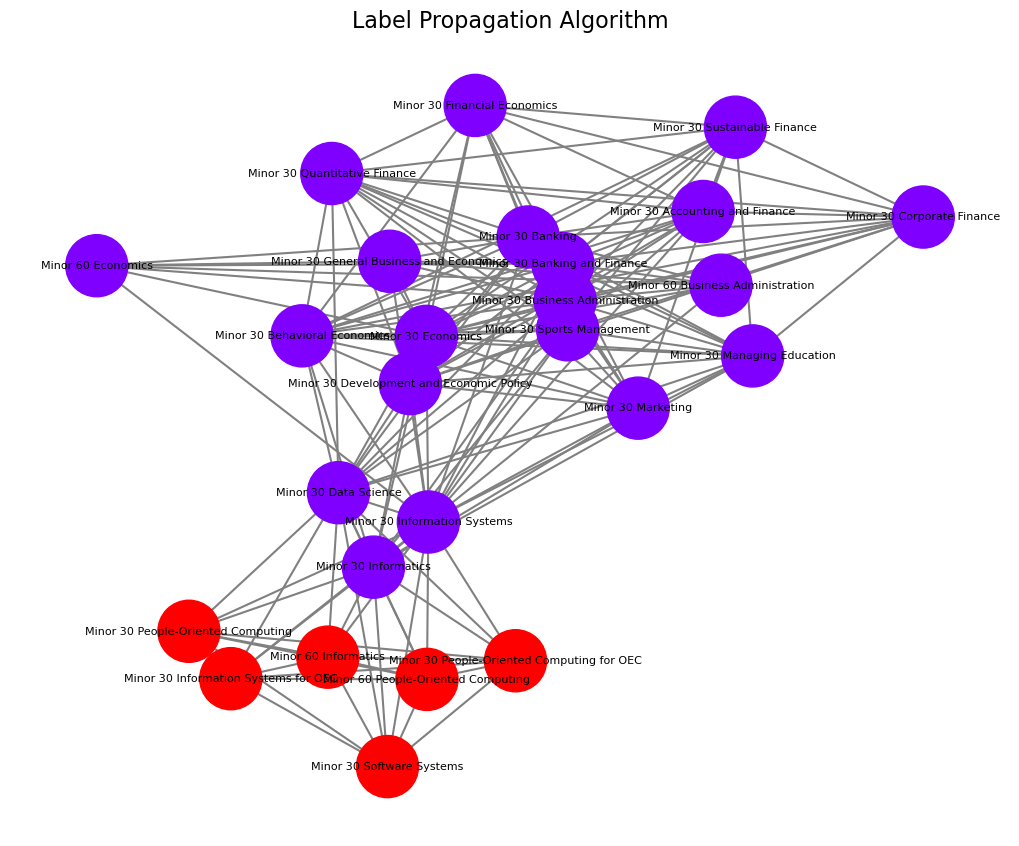

In [88]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities


science_majors = science[science["Program"].str.contains("Major", case=False, na=False)]
economics_majors = economics[economics["Program"].str.contains("Minor", case=False, na=False)]
module_components = pd.read_csv("data/csv/HS24/VVZ_HS24_module_components.csv", encoding="utf-16")
majors = economics_majors


edges = {}


for _, row in module_components.iterrows():
    components = row['Components']
    if pd.isna(components):
        continue
    
    for major in majors['Program']:
        if major in components:
            for other_major in majors['Program']:
                if other_major in components and major != other_major:
                    edge_pair = tuple(sorted([major, other_major]))  
                    if edge_pair in edges:
                        edges[edge_pair] += 1  
                    else:
                        edges[edge_pair] = 1  


G = nx.Graph()


for edge, weight in edges.items():
    G.add_edge(edge[0], edge[1], weight=weight)


def plot_graph(G, communities, title):
    color_map = []
    for node in G.nodes():
        for i, community in enumerate(communities):
            if node in community:
                color_map.append(i)  

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, with_labels=True, node_color=color_map, cmap=plt.cm.rainbow,
        edge_color="gray", node_size=2000, font_size=8, width=1.5
    )
    plt.title(title, fontsize=16)
    plt.show()

# Detect communities using Greedy Modularity Maximization
gc = list(greedy_modularity_communities(G, weight="weight"))
print(f"Greedy Modularity Communities: number = {len(gc)}, communities: {gc}")

# Detect communities using Label Propagation Algorithm
lc = list(label_propagation_communities(G))
print(f"Label Propagation Communities: number = {len(lc)}, communities: {lc}")

# Plot the graph with Greedy Modularity Maximization communities
plot_graph(G, gc, "Greedy Modularity Maximization")

# Plot the graph with Label Propagation Algorithm communities
plot_graph(G, lc, "Label Propagation Algorithm")


Greedy Modularity Communities (adjusted to 6): number = 6, communities: [frozenset({'Major 90 Chemistry and Business Studies', 'Single Major 180 Biochemistry', 'Single Major 90 Chemical and Molecular Sciences (specialized Master)', 'Single Major 180 Chemistry', 'Single Major 90 Chemistry', 'Single Major 180 Chemistry and Business Studies', 'Major 90 Biochemistry', 'Major 120 Chemistry', 'Major 90 Chemistry', 'Single Major 90 Chemistry and Business Studies', 'Major 90 Chemical and Molecular Sciences (specialized Master)', 'Major 150 Chemistry', 'Single Major 90 Biochemistry'}), frozenset({'Single Major 180 Earth System Science', 'Single Major 90 Earth System Science', 'Single Major 180 Geography', 'Major 150 Geography', 'Single Major 90 Geography', 'Major 120 Geography', 'Major 90 Quantitative Environmental Sciences (specialized Master)', 'Major 90 Earth System Science', 'Major 90 Geography', 'Single Major 90 Quantitative Environmental Sciences (specialized Master)'}), {'Major 90 Comput

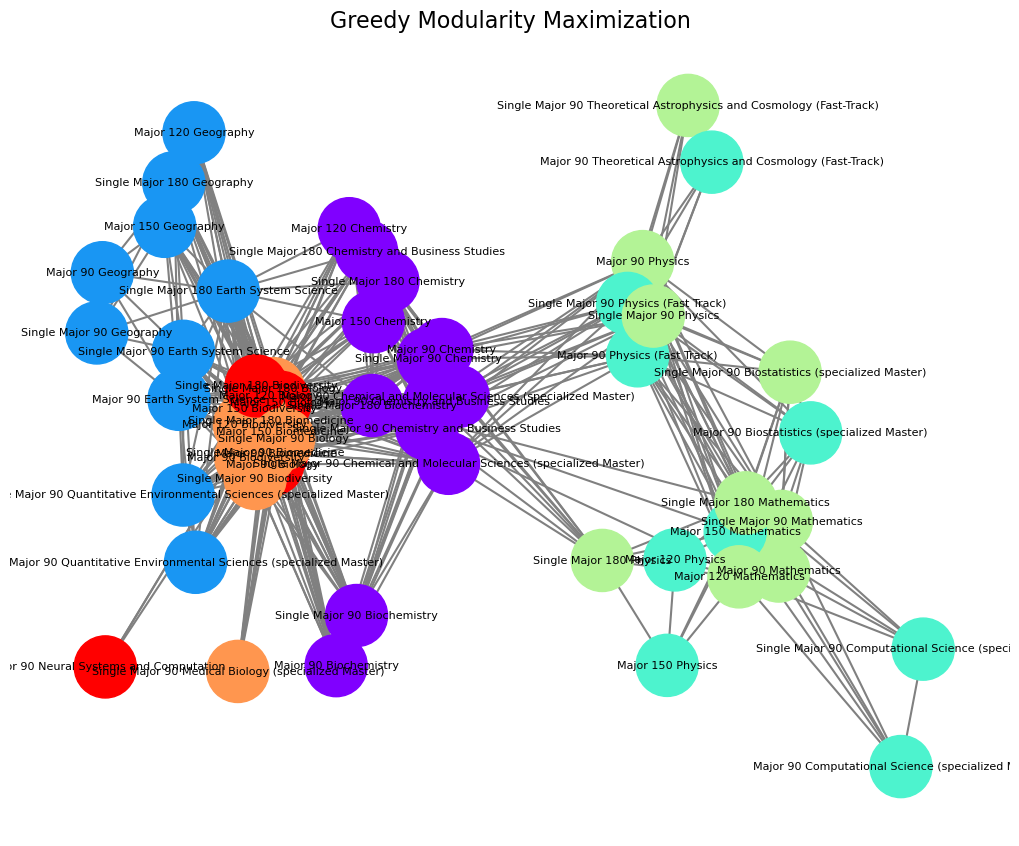

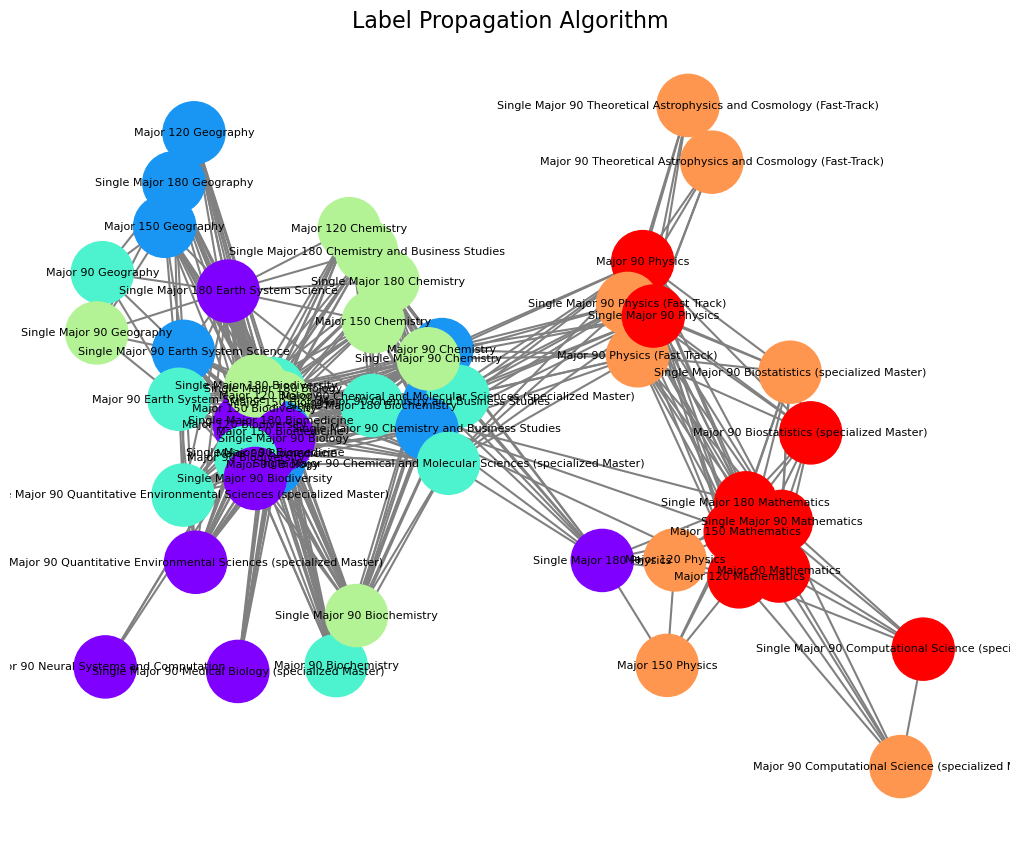

In [80]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities

science_majors = science[science["Program"].str.contains("Major", case=False, na=False)]
economics_majors = economics[economics["Program"].str.contains("Major", case=False, na=False)]
module_components = pd.read_csv("data/csv/HS24/VVZ_HS24_module_components.csv", encoding="utf-16")
majors = science_majors

edges = {}

for _, row in module_components.iterrows():
    components = row['Components']
    if pd.isna(components):
        continue
    
    for major in majors['Program']:
        if major in components:
            for other_major in majors['Program']:
                if other_major in components and major != other_major:
                    edge_pair = tuple(sorted([major, other_major]))  
                    if edge_pair in edges:
                        edges[edge_pair] += 1  
                    else:
                        edges[edge_pair] = 1  

G = nx.Graph()

for edge, weight in edges.items():
    G.add_edge(edge[0], edge[1], weight=weight)

def plot_graph(G, communities, title):
    color_map = []
    for node in G.nodes():
        for i, community in enumerate(communities):
            if node in community:
                color_map.append(i)  

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G, pos, with_labels=True, node_color=color_map, cmap=plt.cm.rainbow,
        edge_color="gray", node_size=2000, font_size=8, width=1.5
    )
    plt.title(title, fontsize=16)
    plt.show()


def adjust_communities(communities, desired_num=6):
    while len(communities) > desired_num:
        
        communities = sorted(communities, key=len)  
        small_community_1 = communities.pop(0) 
        small_community_2 = communities.pop(0)  
     
        merged_community = small_community_1.union(small_community_2)
        communities.append(merged_community)  

    while len(communities) < desired_num:
     
        largest_community = max(communities, key=len)  
        communities.remove(largest_community)  
   
        community_list = list(largest_community)
        midpoint = len(community_list) // 2
        new_community_1 = set(community_list[:midpoint])
        new_community_2 = set(community_list[midpoint:])

        communities.append(new_community_1)
        communities.append(new_community_2)

    return communities


gc = list(greedy_modularity_communities(G, weight="weight"))
gc = adjust_communities(gc, desired_num=6)  
print(f"Greedy Modularity Communities (adjusted to 6): number = {len(gc)}, communities: {gc}")


lc = list(label_propagation_communities(G))
lc = adjust_communities(lc, desired_num=6) 
print(f"Label Propagation Communities (adjusted to 6): number = {len(lc)}, communities: {lc}")


plot_graph(G, gc, "Greedy Modularity Maximization")

plot_graph(G, lc, "Label Propagation Algorithm")
